# lectura de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [2]:
adult_df = pd.read_csv('adult.csv')
adult_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Carácteristicas con datos numéricos o continuos

In [3]:
adult_df[['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Text(0,0.5,'Frecuencia')

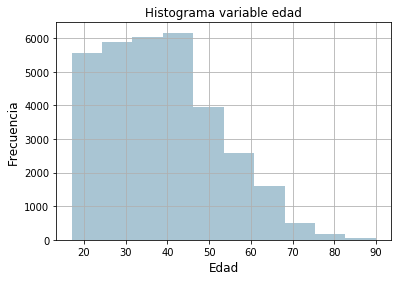

In [4]:
fig, ax = plot.subplots()
adult_df['age'].hist(color='#A9C5D3')
ax.set_title('Histograma variable edad', fontsize=12)
ax.set_xlabel('Edad', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)

## Cambiar valores numeros en valores discretos (Cuantifiación)

In [6]:
adult_df['edad_redondeada'] = np.array(np.floor(np.array(adult_df['age']) / 10.))
rangos = [16, 31, 47, 63, 79, 95]
etiquetas_rangos = [1, 2, 3, 4, 5]
adult_df['edad_rangos'] = pd.cut(np.array(adult_df['age']), 
                                               bins=rangos)
adult_df['edad_etiquetas'] = pd.cut(np.array(adult_df['age']), 
                                               bins=rangos, labels=etiquetas_rangos)
adult_df[['age', 'edad_redondeada', 
               'edad_rangos', 'edad_etiquetas']].iloc[4000:4005]

,age,edad_redondeada,edad_rangos,edad_etiquetas
4000,25,2.0,"(16, 31]",1
4001,21,2.0,"(16, 31]",1
4002,18,1.0,"(16, 31]",1
4003,48,4.0,"(47, 63]",3
4004,27,2.0,"(16, 31]",1


Text(0,0.5,'Frecuencia')

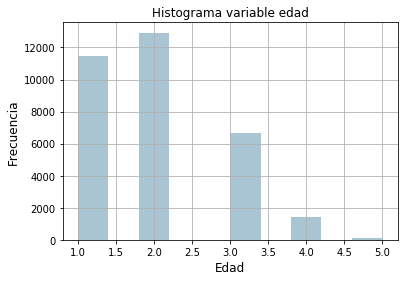

In [7]:
fig, ax = plot.subplots()
adult_df['edad_etiquetas'].hist(color='#A9C5D3')
ax.set_title('Histograma variable edad', fontsize=12)
ax.set_xlabel('Edad', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)
## Los datos con categorización no están uniformes debemos otra opción de categorizar

In [8]:
## probaremos con quartiles
quantile_list = [0, 0.25, .5, 0.75,1.]
quantiles = adult_df['age'].quantile(quantile_list)
quantiles


0.00    17.0
0.25    28.0
0.50    37.0
0.75    48.0
1.00    90.0
Name: age, dtype: float64

In [13]:
adult_df[adult_df['income']=='>50K']['age'].describe()

count    7841.000000
mean       44.249841
std        10.519028
min        19.000000
25%        36.000000
50%        44.000000
75%        51.000000
max        90.000000
Name: age, dtype: float64

Text(0,0.5,'Frecuencia')

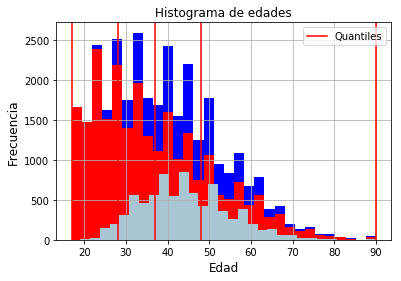

In [26]:
fig, ax = plot.subplots()
#adult_df['age'].hist(bins=30, color='#A9C5D3')
adult_df['age'].hist(bins=30, color='#0000FF')
adult_df[adult_df['income']=='<=50K']['age'].hist(bins=30, color='#FF0000')
adult_df[adult_df['income']=='>50K']['age'].hist(bins=30, color='#A9C5D3')

for quantile in quantiles:
    qvl = plot.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)

ax.set_title('Histograma de edades', fontsize=12)
ax.set_xlabel('Edad', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)

In [22]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
adult_df['age_quantile_range'] = pd.qcut(adult_df['age'], 
                                                 q=quantile_list)
adult_df['age_quantile_label'] = pd.qcut(adult_df['age'], 
                                                 q=quantile_list, labels=quantile_labels)
adult_df[['age', 'age_quantile_range', 'age_quantile_label']].iloc[4:9]

,age,age_quantile_range,age_quantile_label
4,41,"(37.0, 48.0]",50-75Q
5,34,"(28.0, 37.0]",25-50Q
6,38,"(37.0, 48.0]",50-75Q
7,74,"(48.0, 90.0]",75-100Q
8,68,"(48.0, 90.0]",75-100Q
